In [1]:
import datetime
import ephem
import math
import os
import sys 
import time
import urllib2
import re
import numpy as np
import geocoder
%run -i pys/utilsEphem.py

In [2]:
date = '25/03/2017'
time = '14:13:56'
TimeNow = GetDateTime(date,time)

In [3]:
TimeNow = datetime.datetime.now() #"10/01/2017"
TimeNow = TimeNow + datetime.timedelta(hours=0)

Longitude = '7.068703' #'4.60971' #7.11392
Latitude  = '-73.100138' #'-74.08175' #-73.1198 

print TimeNow

2017-03-26 19:16:22.137096


In [4]:
longlat = str(Longitude) + "," + str(Latitude)
print longlat
g = geocoder.google([Longitude, Latitude], method='reverse')
print g.address

7.068703,-73.100138
Cl. 35, Floridablanca, Santander, Colombia


[TwoLine Element set](https://en.wikipedia.org/wiki/Two-line_element_set)  - how [this](http://www.celestrak.com/publications/AIAA/2006-6753/AIAA-2006-6753.pdf) info come

In [5]:
names,elevs,azs,types = GetPositionELAZ(TimeNow,Longitude,Latitude,3)

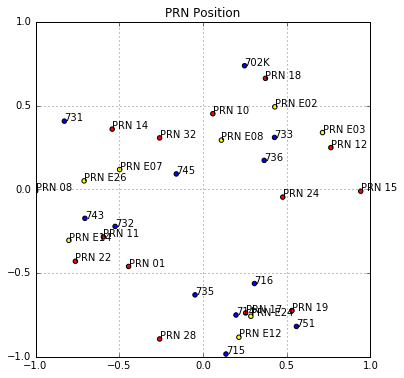

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML 
%matplotlib inline
fig =plt.figure(figsize=(6,6))
colores = colorsyou(types)

Xs,Ys = to_skyplot(elevs,azs)
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
#plt.subplot(111,projection='polar')
plt.scatter(Xs,Ys,c = colores)
plt.title('PRN Position')
plt.grid()
for i,txt in enumerate(names):
    #print txt,i
    plt.annotate(txt, (Xs[i],Ys[i]))#,arrowprops=dict(arrowstyle="-",connectionstyle="arc3")

In [ ]:
def mapr(r):
    """Remap the radial axis."""
    r[:] = [90 - x for x in r]
    return (r)
import copy
els = copy.copy(elevs)
ax = plt.subplot(111, polar=True)
c = plt.scatter(azs,mapr(els), c=colores)
plt.title('PRN Position (polar) \n')
#ax.set_theta_direction(-1)
ax.set_yticks(range(0, 90+10, 10))                   # Define the yticks
yLabel = ['90', '', '', '', '', '', '30', '', '', '']
ax.set_yticklabels(yLabel)
c.set_alpha(0.75)

I can test the results in this [page](http://www.n2yo.com/?s=41554)